# Assignment-1
### Team 44 : Jupiter


In [341]:
# importing all the libraries
%matplotlib inline
import matplotlib.pyplot as plt
from tabulate import tabulate
import pickle
import math
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

### Task 2 : Calculating Bias and Variance


In [342]:
# 2.2.1
# loading the data from .pkl files ( same folder)
file = open('./train.pkl','rb')
data_train = pickle.load(file)
file.close()


file = open('./test.pkl','rb')
data_test = pickle.load(file)
file.close()

In [343]:


# priting training data
df = pd.DataFrame(data_train)

display(df)


,0,1
0,27.427657,3335.782951
1,-4.961835,2647.402652
2,-27.861196,520.733695
3,-15.346340,3518.924914
4,2.867327,-3217.700679
...,...,...
7995,16.144289,-1040.516662
7996,20.696672,636.905131
7997,27.546022,1729.428584
7998,8.974760,1264.438701


In [344]:
# print testing data
df = pd.DataFrame(data_test)

display(df)


,0,1
0,-15.029,-351.992231
1,-25.977,-1807.034364
2,-4.480,-9.003680
3,2.527,2.138886
4,18.039,590.200901
...,...,...
75,22.421,1136.221522
76,5.915,20.758504
77,9.058,74.100416
78,-31.017,-3071.378920


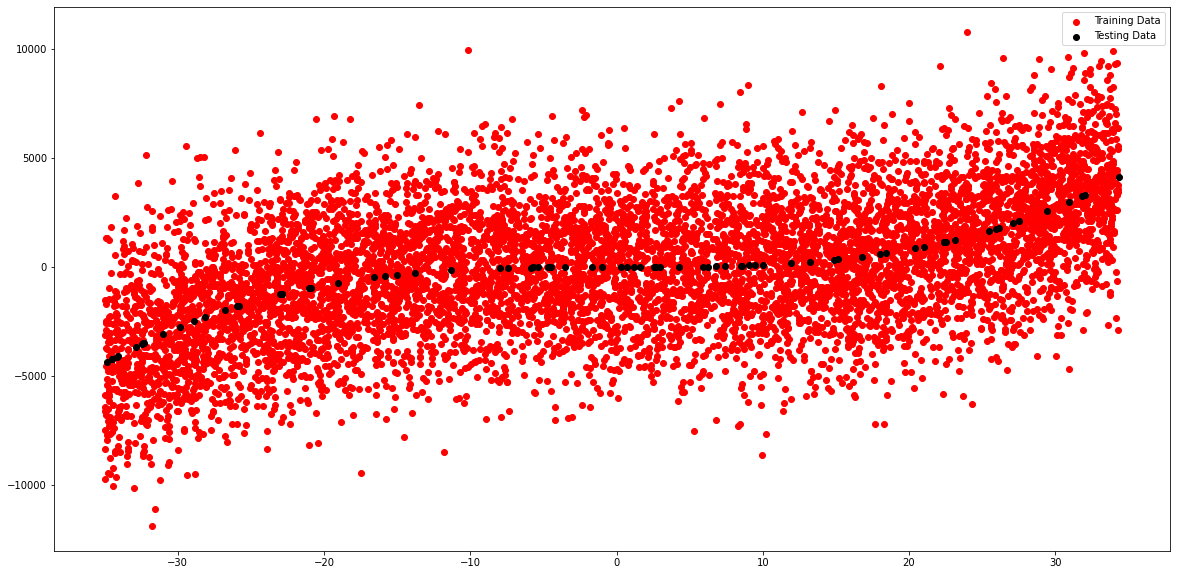

In [345]:
plt.figure(figsize=(20,10))
plt.scatter(np.split(data_train,2,axis=1)[0],np.split(data_train,2,axis=1)[1],label ="Training Data",color="red")
plt.scatter(np.split(data_test,2,axis = 1)[0],np.split(data_test,2,axis=1)[1],label = "Testing Data",color="black")
plt.legend()
plt.show()

In [346]:
#0th index to be stored in text_X
test_X = data_test[:,0]
#1st index to be stored in test_Y
test_Y = data_test[:,1]
# dividing into 16 training sets and storing in train_X and train_Y as numpy array
train_X = []
train_Y = []
np.random.shuffle(data_train)
length = int(data_train.shape[0]/16)
x = data_train[0:data_train.shape[0],0]
y = data_train[0:data_train.shape[0],1]
xtrain = np.array_split(x,16)
ytrain = np.array_split(y,16)
# print(xtrain)

for i in range(16):
    xtrain[i] = xtrain[i].reshape(-1,1)
    
    
for i in range(16):
    train_X.append(data_train[i*length:(i+1)*length,0])
    train_Y.append(data_train[i*length:(i+1)*length,1]) 
train_X = np.array(train_X)
train_Y = np.array(train_Y)
# print(xtrain.shape)
# print(xtrain)
# print(train_X.shape)
# print(train_Y.shape)
# print(train_X)
# print(train_Y)


In [347]:
#   task 2.2.2

# On the training dataset, the models are trained.
# In the following cell, we train each model (i.e. polynomial of a specific degree) 20 times on each partition.
# The model's performance metrics are computed by calculating its bias and variance on each data point (in the test set) across the model's 20 realisations.
# The model's mean bias (or variance) is then the average of the bias (or variance) values calculated for each data point (in the test set). 

In [348]:
# arrays to stored all the values like mse, variance , error...
MSE = []
totalpredictions = []
bias2 = []
bias = []
variance = []
irre_error = []
final = []

# arange = Returns an array with evenly spaced elements as per the interval.

deg = np.arange(1, 16)
Array = np.zeros((16,50))

for d in deg:
    err = []
    pred = []
    for i in range(16):
        polynomial = PolynomialFeatures(degree=d)
        curtrainX = polynomial.fit_transform(train_X[i].reshape(-1, 1))
        testdeg_x = polynomial.fit_transform(test_X.reshape(-1,1)) 
        model = linear_model.LinearRegression()
        # fit on X = curtrainX , y = train_Y , where y is 1d and X is multi
        model.fit(curtrainX, train_Y[i])
        # result is stored in degPred which is further appended in pred list
        degPred = model.predict(testdeg_x)
        #pre = np.array(model.predict(testdeg_x))
        #Array[i] = pre
        pred.append(degPred)
        #it is just the average of the squared difference between the predicted and the actual data points.
        err.append(mean_squared_error(test_Y, degPred))
        
    
       #final = np.mean(Array,axis=0)
     
    errr=np.array(err)
    # .T gives the transform 
    # operands could not be broadcast together with shapes (16,) (80,) so we use .T that makes it (80,16)


    predicted=np.array(pred).T
    #print(np.shape(predicted))
    predMean=np.mean(predicted, axis=1)
    
    diffbias=np.abs(predMean-test_Y)
    biasMean=np.mean(diffbias)
    sq=np.mean(diffbias**2)
    MSE.append(np.mean(errr))
    bias2.append(sq)
    bias.append(biasMean)
    variance.append(np.mean((predicted.T-predMean.T)**2))
    totalpredictions.append(predMean)
    
    
MSE=np.array(MSE)
# print(np.shape(MSE))
bias2 = np.array(bias2)
bias  = np.array(bias)
variance = np.array(variance)
totalpredictions = np.array(totalpredictions)
irre_error = MSE-bias2 - variance

# print(irre_error)
# print(MSE)
# print(variance)
# print(bias)hiow to 
# print(irre_error)

diction = {
    'Degree' : deg,
    'MSE' : MSE,
    'Bias^2':bias2,
    'Variance' : variance,
    'Irreducible error' : irre_error
}

# print(tabulate(diction,headers='keys',tablefmt = 'github'))
# data_items = diction.items()

data_list = list(data_items)


df = pd.DataFrame(diction)
# print(df)
display(df)
# plt.plot(range(1,16),irre_error)
# plt.title("Irreducible error")
# plt.xlabel("Model Complexity")
# plt.ylabel("Irreducible Error")
# plt.show()

,Degree,MSE,Bias^2,Variance,Irreducible error
0,1,529723.820838,492454.517127,37269.303711,-1.091394e-10
1,2,516764.111733,469479.861761,47284.249973,2.910383e-11
2,3,56008.343196,3536.522135,52471.821060,0.000000e+00
3,4,86626.225284,3165.005385,83461.219899,0.000000e+00
4,5,102691.013274,2719.528115,99971.485160,-2.910383e-11
5,6,115113.435405,2511.063397,112602.372008,0.000000e+00
6,7,155895.046966,3327.810038,152567.236928,-2.910383e-11
7,8,170355.236220,3423.931174,166931.305046,2.910383e-11
8,9,183820.132915,2823.875462,180996.257453,2.910383e-11
9,10,239027.105622,3990.614743,235036.490879,0.000000e+00


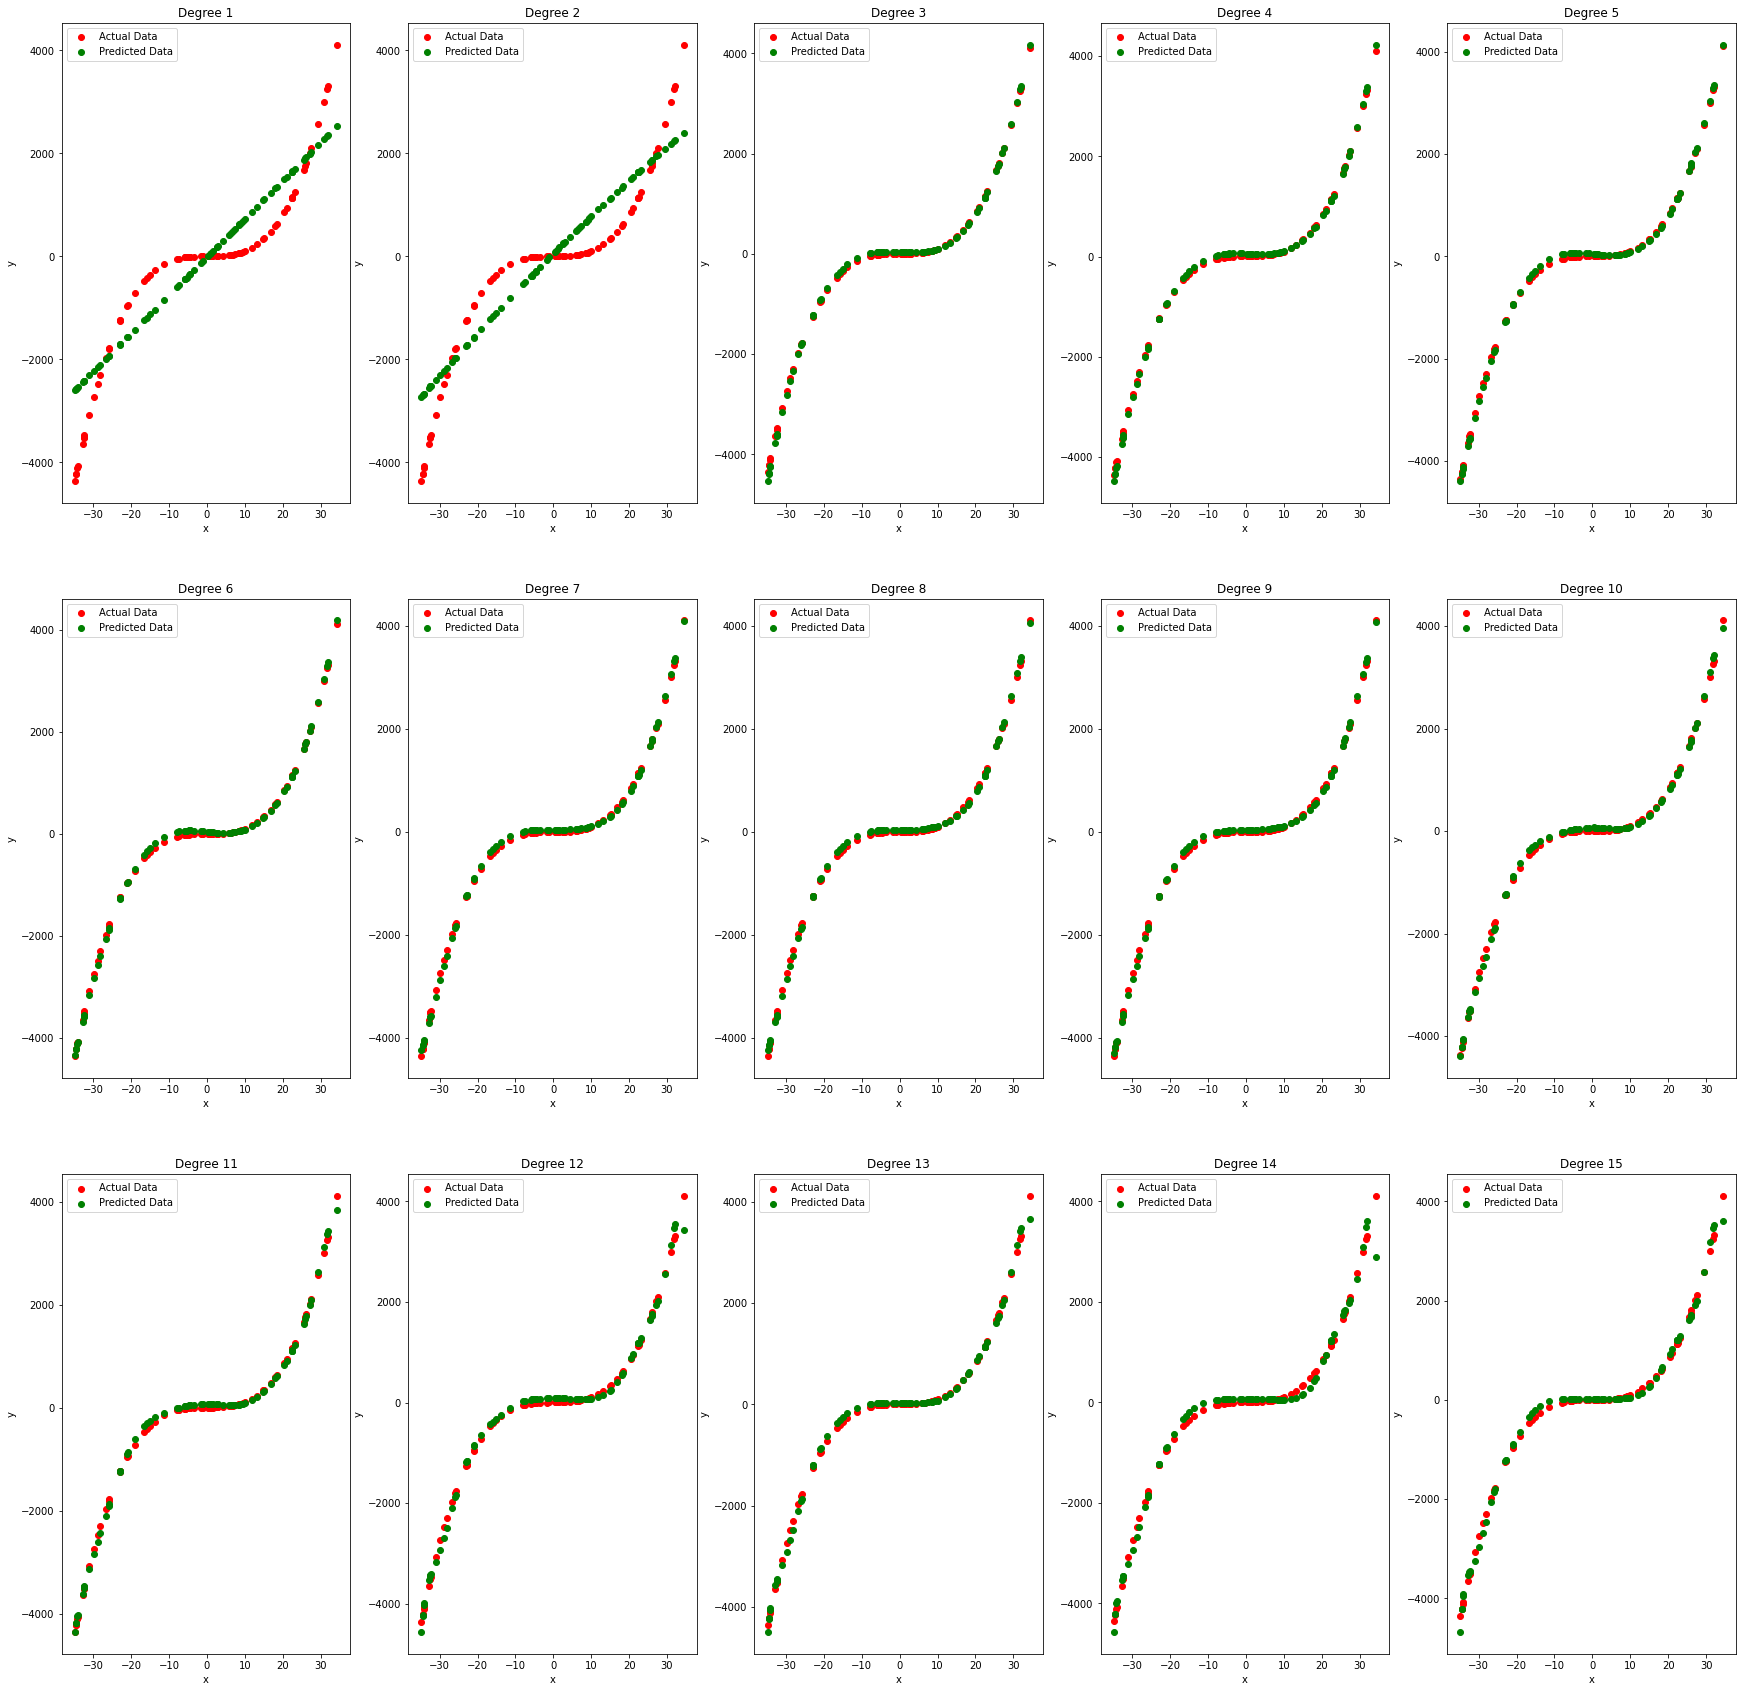

In [349]:
fig, axs = plt.subplots(3,5,figsize=(30, 30))

for degree in range(15):    
    axs.flat[degree].scatter(test_X, test_Y, label='Actual Data',color='r')
    axs.flat[degree].scatter(test_X, totalpredictions[degree], label='Predicted Data',color='g')
    axs.flat[degree].set(xlabel='x', ylabel='y')
    axs.flat[degree].set_title('Degree ' + str(degree+1))
    axs.flat[degree].legend()
# plt.savefig("figure1.jpg")

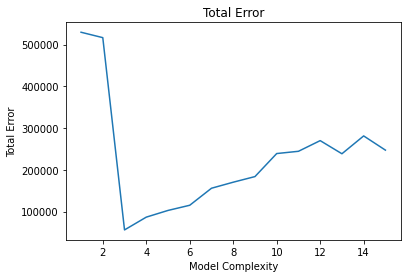

In [350]:
plt.plot(range(1,16),MSE)
plt.title("Total Error")
plt.xlabel("Model Complexity")
plt.ylabel("Total Error")
plt.show()

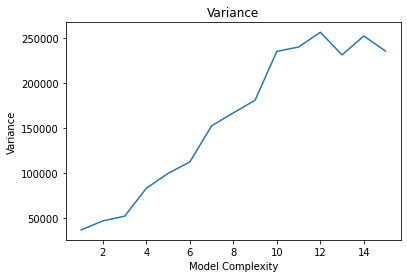

In [351]:
plt.plot(range(1,16),variance)
plt.title("Variance")
plt.xlabel("Model Complexity")
plt.ylabel("Variance")
plt.show()

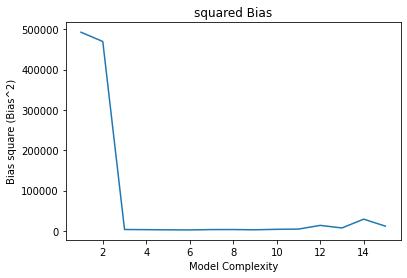

In [352]:
plt.plot(range(1,16),bias2)
plt.title("squared Bias")
plt.xlabel("Model Complexity")
plt.ylabel("Bias square (Bias^2)")
plt.show()

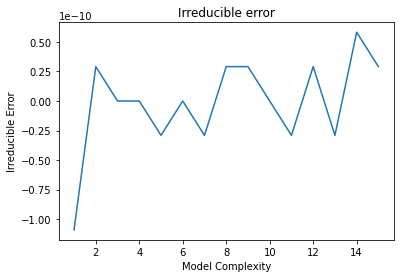

In [353]:
plt.plot(range(1,16),irre_error)
plt.title("Irreducible error")
plt.xlabel("Model Complexity")
plt.ylabel("Irreducible Error")
plt.show()

Coordinates of Optimal Model Complexity
(2.8961322685226456,51932.99981935186)


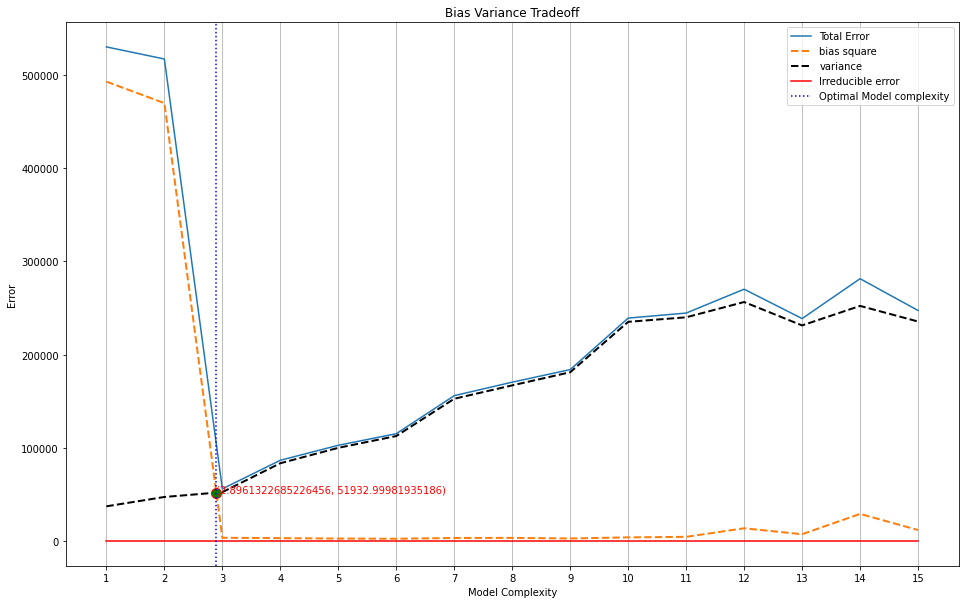

In [354]:

from shapely.geometry import LineString
plt.figure(figsize=(16, 10))
plt.plot(range(1,16),MSE, label='Total Error')
plt.plot(range(1,16),bias2,label='bias square',linestyle='dashed',linewidth='2')
plt.plot(range(1,16),variance, label='variance',linestyle='dashed',linewidth='2',color='black')
plt.plot(range(1,16),irre_error, label='Irreducible error',color='red')
plt.xlabel("Model Complexity")
plt.ylabel("Error")
plt.title("Bias Variance Tradeoff")
plt.xticks(deg)
degrees = np.array(deg)
line1 = LineString(np.column_stack((bias2,degrees)))
# print(line1)
line2 = LineString(np.column_stack((variance,degrees)))
# print(line2)
intersection = line2.intersection(line1)

# plt.plot(intersection.x,'ro')
xx = np.array([intersection.y])
yy=np.array([intersection.x])
plt.plot(xx, yy, marker="o", markeredgecolor="red", markerfacecolor="green",markersize=10)
plt.axvline(x = intersection.y, color = 'b',linestyle="dotted",label="Optimal Model complexity")
plt.text(xx,yy,(xx[0],yy[0]),color='red')
print("Coordinates of Optimal Model Complexity")
print("({},{})".format(xx[0],yy[0]))

plt.grid(axis='x')
plt.legend()
plt.show()

# plt.savefig("figure2.jpg")
